<a href="https://colab.research.google.com/github/dandukhovnij/Python-Projects/blob/main/Exploratory_data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Mate_homework

/content/drive/MyDrive/Mate_homework


In [ ]:
countries_data = pd.read_csv("countries.csv")
countries_data.head(5)

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
countries_data.shape

(249, 5)

In [ ]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
events_data = pd.read_csv("events.csv")
events_data.head(5)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
events_data.shape

(1330, 10)

In [ ]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
products_data = pd.read_csv("products.csv")
products_data.head(5)

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
products_data.shape

(12, 2)

In [ ]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


Дивимось пропущені значеня у countries_data

In [ ]:
countries_data.isna().sum()

,0
name,0
alpha-2,1
alpha-3,0
region,1
sub-region,1


Дивимось відсоток пропущених значень у countries_data

In [ ]:
countries_data.isna().sum() / countries_data.shape[0] * 100

,0
name,0.000000
alpha-2,0.401606
alpha-3,0.000000
region,0.401606
sub-region,0.401606


Дивимось пропущені значення значеня у events_data

In [ ]:
events_data.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


Дивимось відсоток пропущених значень у events_data

In [ ]:
events_data.isna().sum() / events_data.shape[0] * 100

,0
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Order Priority,0.000000
Country Code,6.165414
Product ID,0.000000
Sales Channel,0.000000
Units Sold,0.150376
Unit Price,0.000000
Unit Cost,0.000000


Дивимось пропущені значення у products_data

In [ ]:
products_data.isna().sum()

,0
id,0
item_type,0


Видаляємо та заповнюэмо пропущены значення з таблиць

In [ ]:
countries_data = countries_data.dropna()

In [ ]:
events_data["Units Sold"] = events_data["Units Sold"].fillna(events_data["Units Sold"].median())

In [ ]:
events_data = events_data.dropna()

Були видалені рядки з пропущеними значеннями так як немає універсального варіанту їх заповнення. Тільки units sold було заповнено, бо там можна було використати медіану для заповнення.

Перетворюємо тип даних з таблиці events_data в колонках Order Date та Ship Date на datetime

In [ ]:
events_data["Order Date"] = pd.to_datetime(events_data["Order Date"])
events_data["Ship Date"] = pd.to_datetime(events_data["Ship Date"])

<ipython-input-22-2227319626>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_data["Order Date"] = pd.to_datetime(events_data["Order Date"])
<ipython-input-22-2227319626>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_data["Ship Date"] = pd.to_datetime(events_data["Ship Date"])


Перевіряємо дані на наявність дублікатів

In [ ]:
countries_data.duplicated().sum()

np.int64(0)

In [ ]:
events_data.duplicated().sum()

np.int64(0)

In [ ]:
products_data.duplicated().sum()

np.int64(0)

Перевіряємо дані на наявність аномалій

In [ ]:
events_data[["Units Sold", "Unit Price", "Unit Cost"]].describe()

,Units Sold,Unit Price,Unit Cost
count,1248.000000,1248.000000,1248.000000
mean,4953.201122,264.183526,186.349143
std,2913.485966,216.526905,175.473997
min,2.000000,9.330000,6.920000
25%,2349.750000,81.730000,35.840000
50%,4971.500000,154.060000,97.440000
75%,7471.000000,425.717500,263.330000
max,9999.000000,668.270000,524.960000


Дублікати та аномалії в даних не були знайдені.

Видаляємо непотрбіні колонки

In [ ]:
countries_data = countries_data.drop("alpha-2", axis=1)

Перейменовуємо колонки в countries_data

In [ ]:
countries_data = countries_data.rename(columns={"alpha-3": "Country Code", "name": "Name", "region": "Region", "sub-region": "Sub-region"})

Виконуємо об'єднання датафреймів

In [ ]:
data = pd.merge(countries_data, events_data, on="Country Code", how="inner")

Перейменовуємо колонки в events_data

In [ ]:
products_data = products_data.rename(columns={"id": "Product ID", "item_type": "Item Type"})

Виконуємо остаточне об'єднання датафреймів

In [ ]:
data = pd.merge(data, products_data, on="Product ID", how="inner")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            1248 non-null   object        
 1   Country Code    1248 non-null   object        
 2   Region          1248 non-null   object        
 3   Sub-region      1248 non-null   object        
 4   Order ID        1248 non-null   int64         
 5   Order Date      1248 non-null   datetime64[ns]
 6   Ship Date       1248 non-null   datetime64[ns]
 7   Order Priority  1248 non-null   object        
 8   Product ID      1248 non-null   int64         
 9   Sales Channel   1248 non-null   object        
 10  Units Sold      1248 non-null   float64       
 11  Unit Price      1248 non-null   float64       
 12  Unit Cost       1248 non-null   float64       
 13  Item Type       1248 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(7)
me

Розраховуємо та додаємо нові колонки в датафрейм для подальших розрахунків

In [ ]:
data['Shipping Days'] = (data['Ship Date'] - data['Order Date']).dt.days
data["Revenue"] = data["Units Sold"] * data["Unit Price"]
data["Cost"] = data["Units Sold"] * data["Unit Cost"]
data["Profit"] = data["Revenue"] - data["Cost"]
data.head(5)

,Name,Country Code,Region,Sub-region,Order ID,Order Date,Ship Date,Order Priority,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Item Type,Shipping Days,Revenue,Cost,Profit
0,Albania,ALB,Europe,Southern Europe,152191388,2012-05-18,2012-06-22,L,7331,Offline,5669.0,255.28,159.42,Baby Food,35,1447182.32,903751.98,543430.34
1,Albania,ALB,Europe,Southern Europe,208238399,2015-08-29,2015-10-15,L,8293,Offline,1224.0,437.20,263.33,Cosmetics,47,535132.80,322315.92,212816.88
2,Albania,ALB,Europe,Southern Europe,246922719,2015-07-13,2015-07-29,H,8681,Online,8775.0,651.21,524.96,Office Supplies,16,5714367.75,4606524.00,1107843.75
3,Albania,ALB,Europe,Southern Europe,270358788,2014-12-11,2015-01-24,M,1270,Offline,4028.0,47.45,31.79,Beverages,44,191128.60,128050.12,63078.48
4,Albania,ALB,Europe,Southern Europe,357930982,2016-01-16,2016-03-05,C,2455,Offline,8586.0,109.28,35.84,Clothes,49,938278.08,307722.24,630555.84


Розраховуємо ключові метрики діяльності компанії

In [ ]:
print(f"Total Orders: {data['Order ID'].count()}")
print(f"Total Units Sold: {data['Units Sold'].sum()}")
print(f"Total Revenue: {data['Revenue'].sum()}")
print(f"Total Cost: {data['Cost'].sum()}")
print(f"Total Profit: {data['Profit'].sum()}")
print(f"Counties Covered: {data['Name'].nunique()}")
print(f"Average Units Per Order: {data['Units Sold'].mean()}")
print(f"Average Profit Per Order: {data['Profit'].mean()}")
print(f"Average Unit Price: {data['Unit Price'].mean()}")
print(f"Average Unit Cost: {data['Unit Cost'].mean()}")
print(f"Average Shipping Days: {data['Shipping Days'].mean()}")
print(f"Median Shipping Days: {data['Shipping Days'].median()}")
print(f"Max Shipping Days: {data['Shipping Days'].max()}")
print(f"Min Shipping Days: {data['Shipping Days'].min()}")


Total Orders: 1248
Total Units Sold: 6181595.0
Total Revenue: 1601482723.7
Total Cost: 1127365514.52
Total Profit: 474117209.17999995
Counties Covered: 45
Average Units Per Order: 4953.201121794872
Average Profit Per Order: 379901.6099198717
Average Unit Price: 264.1835256410256
Average Unit Cost: 186.3491426282051
Average Shipping Days: 24.86378205128205
Median Shipping Days: 25.0
Max Shipping Days: 50
Min Shipping Days: 0


Виконаємо візуалізацію та проаналузіємо продажі в розрізі категорій, країн та регіонів

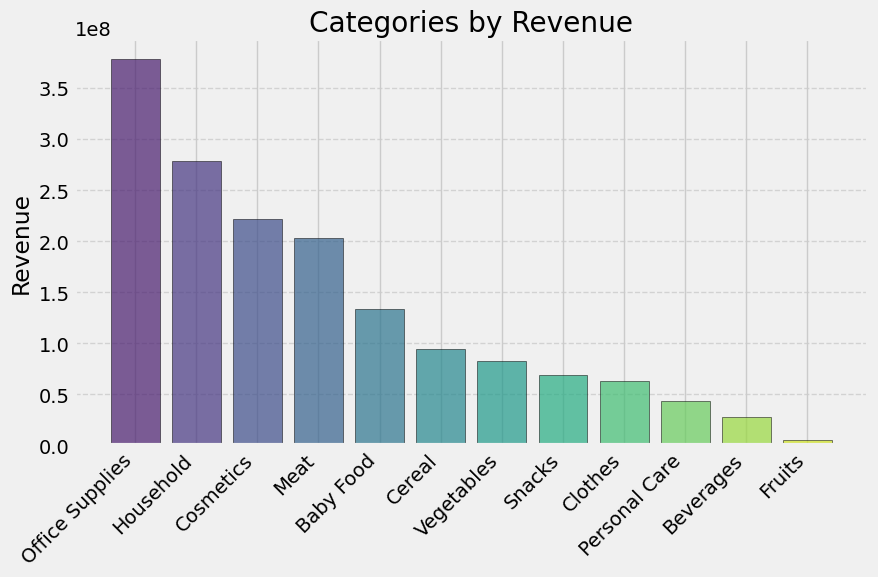

In [ ]:
plt.style.use('fivethirtyeight')

categories = (data.groupby('Item Type')['Revenue'].sum().sort_values(ascending=False))

colors = sns.color_palette("viridis", len(categories))

plt.figure(figsize=(9,6))
plt.bar(categories.index, categories.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Categories by Revenue")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()


Найбільші доходи отримані в категоріях: Office Supplies, Household та Cosmetics, а найменше у Fruits, Beverages, Personal Care

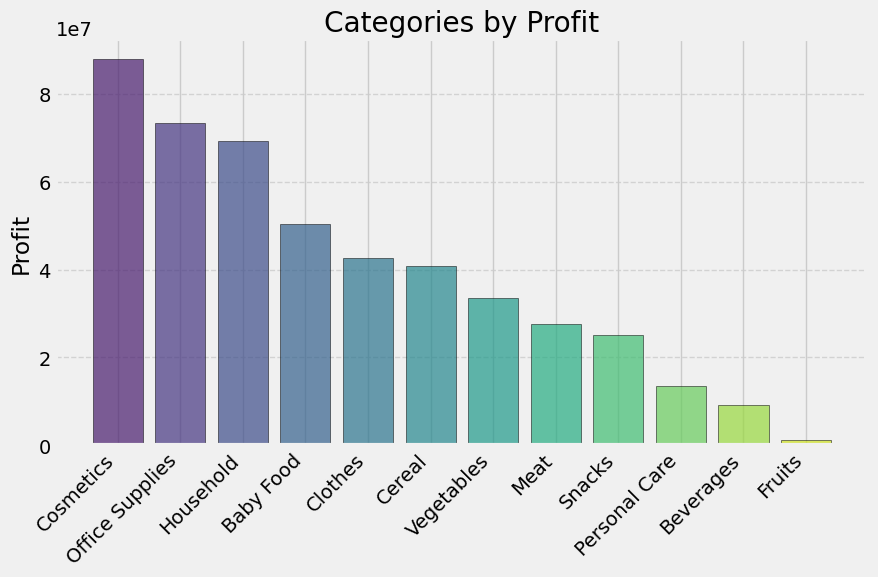

In [ ]:
categories = (data.groupby('Item Type')['Profit'].sum().sort_values(ascending=False))
colors = sns.color_palette("viridis", len(categories))

plt.figure(figsize=(9,6))
plt.bar(categories.index, categories.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Categories by Profit")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Profit")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Найбільші прибутки отримані в категоріях: Cosmetics, Office Supplies та Household, а найменше у Fruits, Beverages, Personal Care

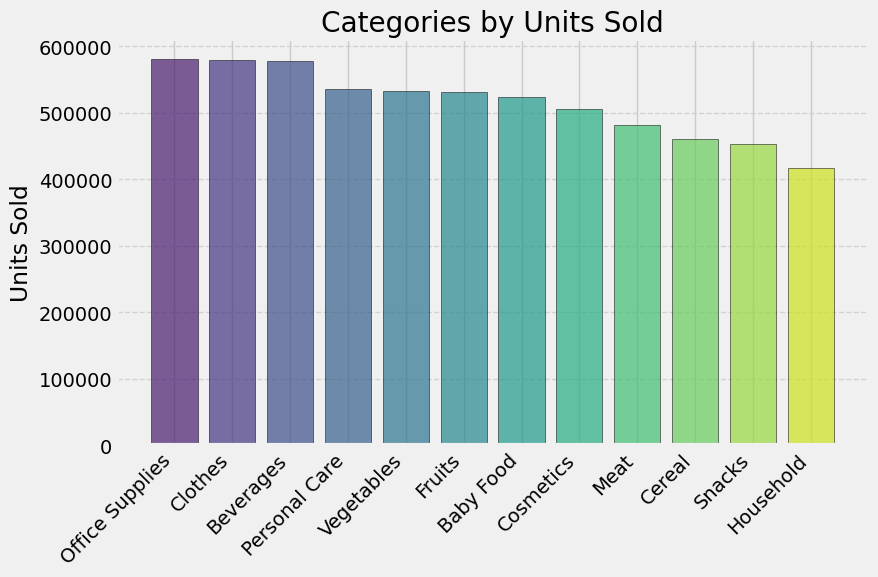

In [ ]:
categories = (data.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False))
colors = sns.color_palette("viridis", len(categories))

plt.figure(figsize=(9,6))
plt.bar(categories.index, categories.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Categories by Units Sold")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Units Sold")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Найбільше за кількістю товарів було продано в кетогоріях: Office Supplies, Clothes та Beverages, а найменше у Household, Snacks, Cereal

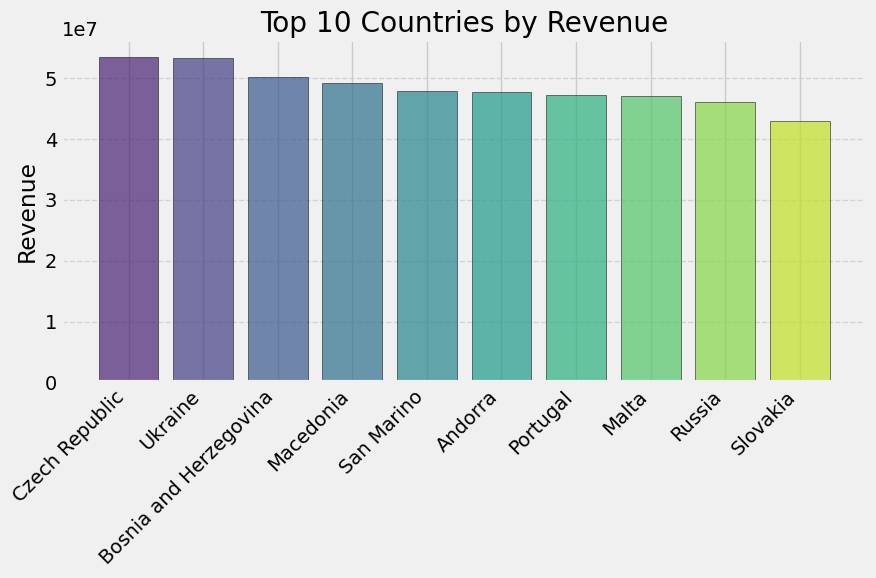

In [ ]:
countries = (data.groupby('Name')['Revenue'].sum().sort_values(ascending=False).head(10))
colors = sns.color_palette("viridis", len(countries))

plt.figure(figsize=(9,6))
plt.bar(countries.index, countries.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Top 10 Countries by Revenue")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Найбільший дохід був отриманий в країнах: Chech Republic, Ukraine, Bosnia and Herzegovina

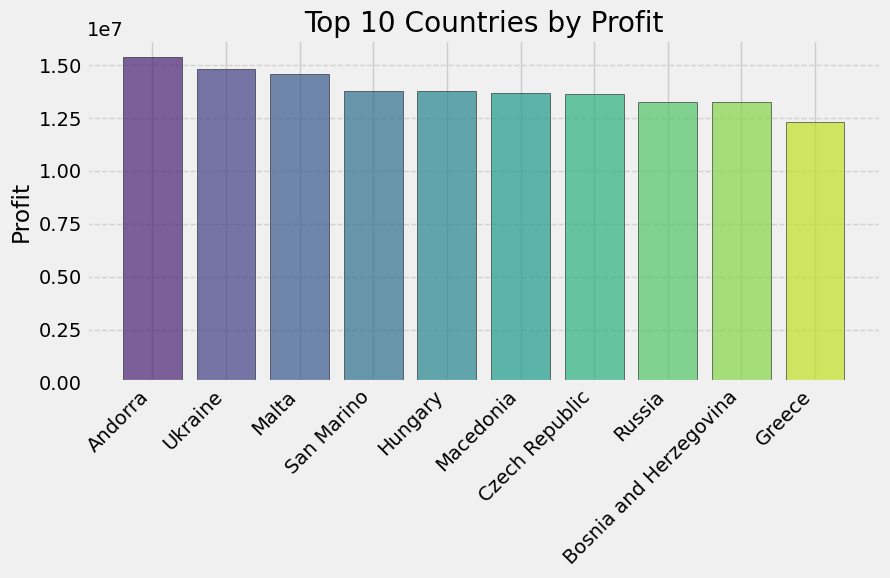

In [ ]:
countries = (data.groupby('Name')['Profit'].sum().sort_values(ascending=False).head(10))
colors = sns.color_palette("viridis", len(countries))

plt.figure(figsize=(9,6))
plt.bar(countries.index, countries.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Top 10 Countries by Profit")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Profit")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Найбільший прибуток був отриманий в країнах: Andorra, Ukraine, Malta

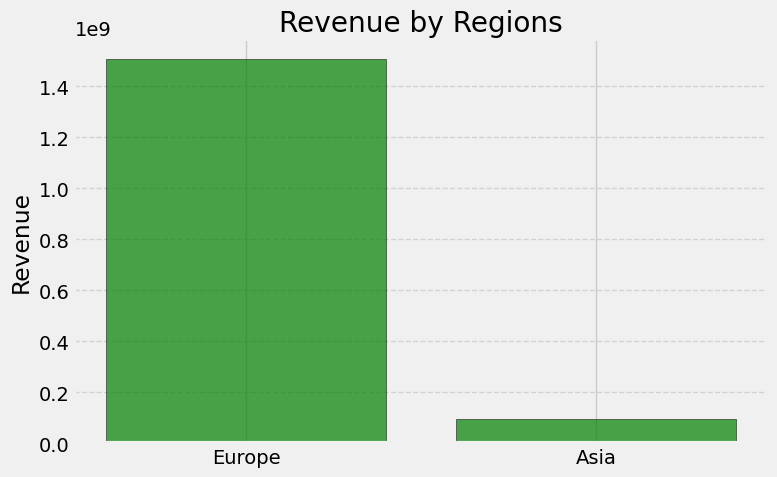

In [ ]:
regions = (data.groupby('Region')['Revenue'].sum().sort_values(ascending=False))

plt.figure(figsize=(8,5))
plt.bar(regions.index, regions.values, color='green', edgecolor='black', alpha=0.7)
plt.title("Revenue by Regions")
plt.ylabel("Revenue")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Дохід в Європі значно більший за дохід в Азії

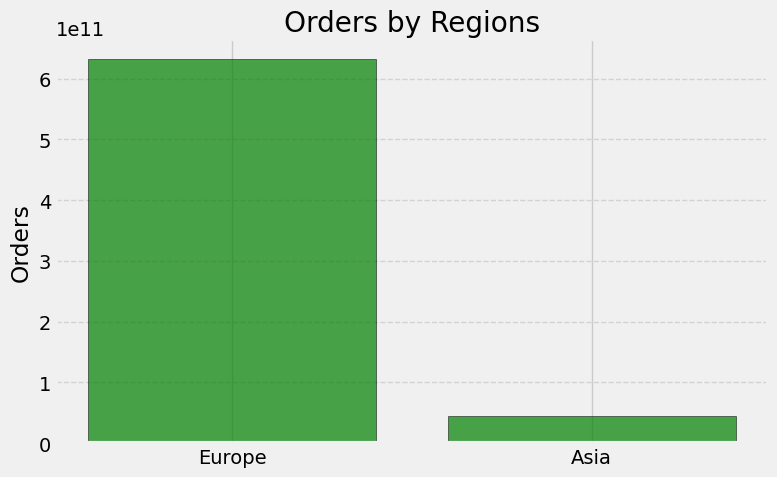

In [ ]:
regions = (data.groupby('Region')['Order ID'].sum().sort_values(ascending=False))

plt.figure(figsize=(8,5))
plt.bar(regions.index, regions.values, color='green', edgecolor='black', alpha=0.7)
plt.title("Orders by Regions")
plt.ylabel("Orders")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Приводимо дані з колонки Sales Channel до однакового регістру

In [ ]:
data['Sales Channel'] = data['Sales Channel'].str.capitalize()

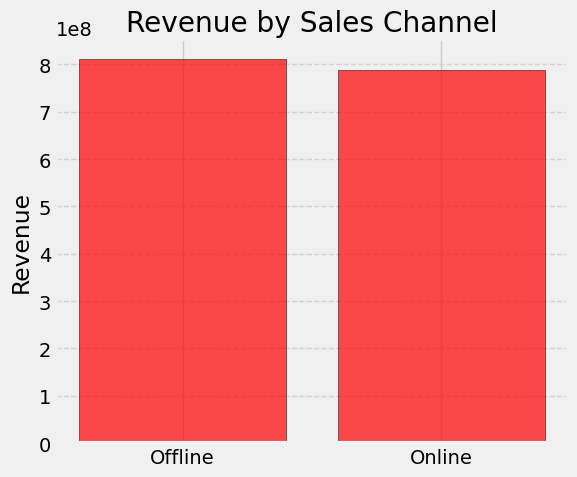

In [ ]:
channels = (data.groupby('Sales Channel')['Revenue'].sum().sort_values(ascending=False))

plt.figure(figsize=(6,5))
plt.bar(channels.index, channels.values, color='red', edgecolor='black', alpha=0.7)
plt.title("Revenue by Sales Channel")
plt.ylabel("Revenue")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Дохід через офлайн трохи більше за дохід через онлайн

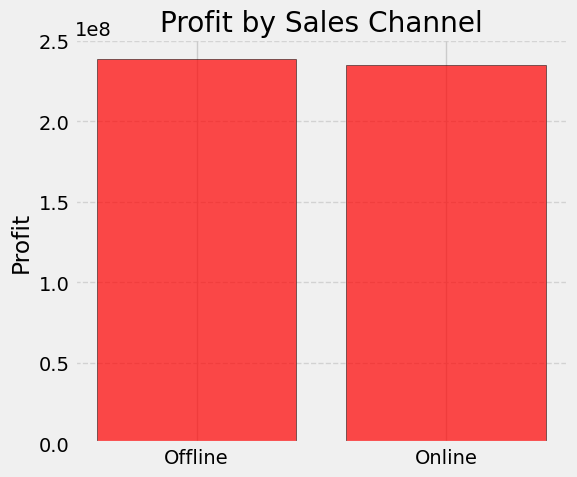

In [ ]:
channels = (data.groupby('Sales Channel')['Profit'].sum().sort_values(ascending=False))

plt.figure(figsize=(6,5))
plt.bar(channels.index, channels.values, color='red', edgecolor='black', alpha=0.7)
plt.title("Profit by Sales Channel")
plt.ylabel("Profit")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Прибуток через офлайн трохи більший за прибуток через онлайн відповідно до доходу

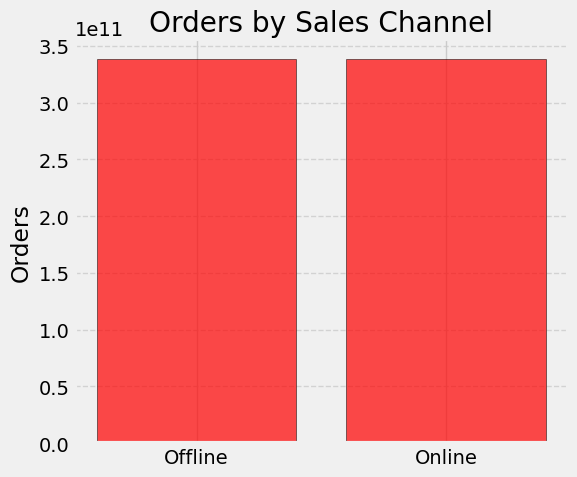

In [ ]:
channels = (data.groupby('Sales Channel')['Order ID'].sum().sort_values(ascending=False))

plt.figure(figsize=(6,5))
plt.bar(channels.index, channels.values, color='red', edgecolor='black', alpha=0.7)
plt.title("Orders by Sales Channel")
plt.ylabel("Orders")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

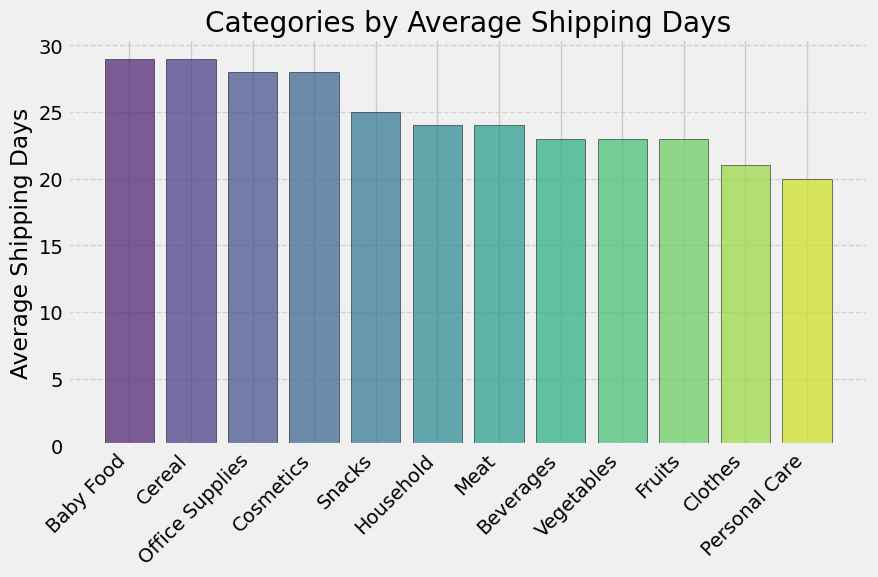

In [ ]:
categories = (data.groupby('Item Type')['Shipping Days'].median().sort_values(ascending=False))
colors = sns.color_palette("viridis", len(categories))

plt.figure(figsize=(9,6))
plt.bar(categories.index, categories.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Categories by Average Shipping Days")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

В середньому найдовше йде доставка у категоріях: Baby Food, Cereal, Office Supplies, а найшвидше у Personal Care, Clothes, Fruits

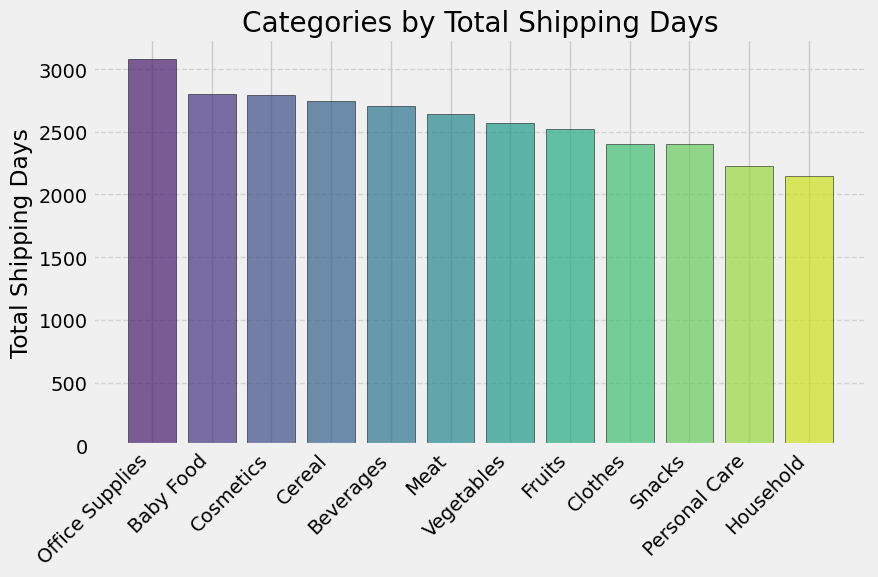

In [ ]:
categories = (data.groupby('Item Type')['Shipping Days'].sum().sort_values(ascending=False))
colors = sns.color_palette("viridis", len(categories))

plt.figure(figsize=(9,6))
plt.bar(categories.index, categories.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Categories by Total Shipping Days")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

В сумі найдовше йде доставка у категоріях: Cereal, Office Supplies, Baby Food, Cosmetics, а найшвидше у Snacks, Clothes, Fruits

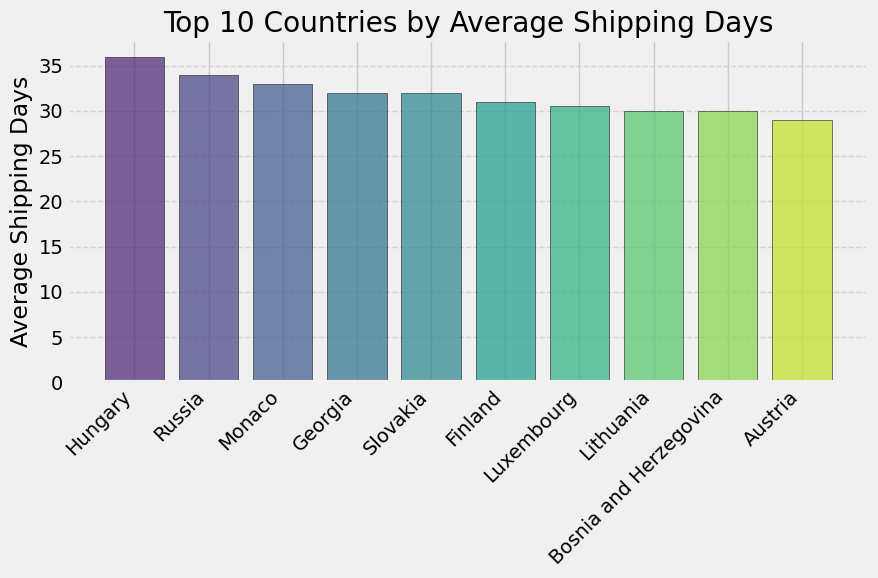

In [ ]:
countries = (data.groupby('Name')['Shipping Days'].median().sort_values(ascending=False).head(10))
colors = sns.color_palette("viridis", len(countries))

plt.figure(figsize=(9,6))
plt.bar(countries.index, countries.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Top 10 Countries by Average Shipping Days")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

В середньому найдовше йде доставка через країни: Hungary, Russia, Monaco, а найшвидше через Austria, Bosnia and Herzegovina, Lithuania

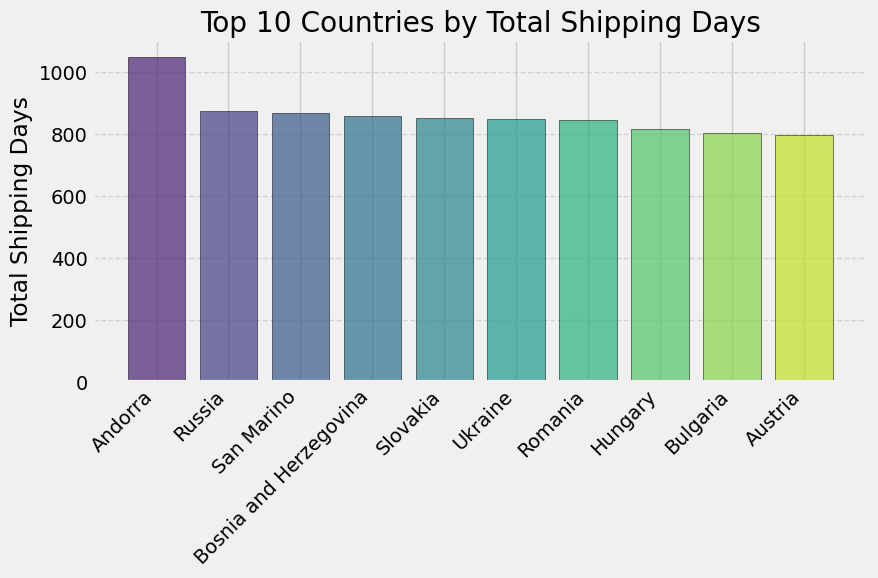

In [ ]:
countries = (data.groupby('Name')['Shipping Days'].sum().sort_values(ascending=False).head(10))
colors = sns.color_palette("viridis", len(countries))

plt.figure(figsize=(9,6))
plt.bar(countries.index, countries.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Top 10 Countries by Total Shipping Days")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

В сумі найдовше йде доставка через країни: Andorra, Russia, San Marino, а найшвидше через Austria, Bulgaria, Hungary

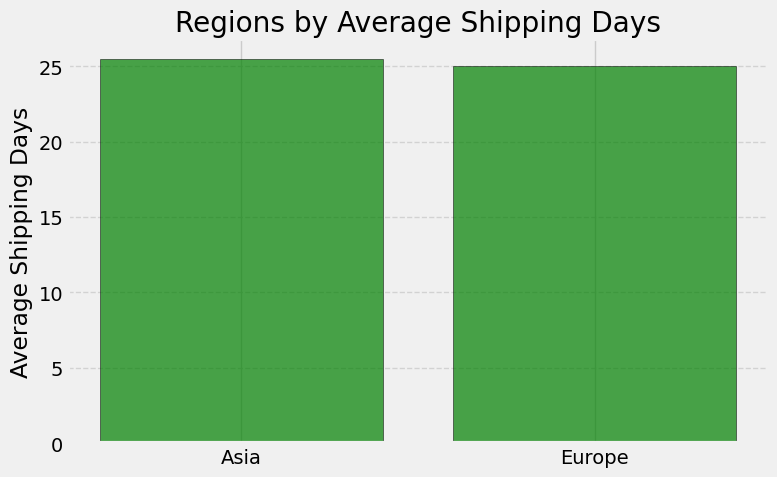

In [ ]:
regions = (data.groupby('Region')['Shipping Days'].median().sort_values(ascending=False))

plt.figure(figsize=(8,5))
plt.bar(regions.index, regions.values, color='green', edgecolor='black', alpha=0.7)
plt.title("Regions by Average Shipping Days")
plt.ylabel("Average Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

В середьому в Азії дні доставки трохи більші ніж у Європі

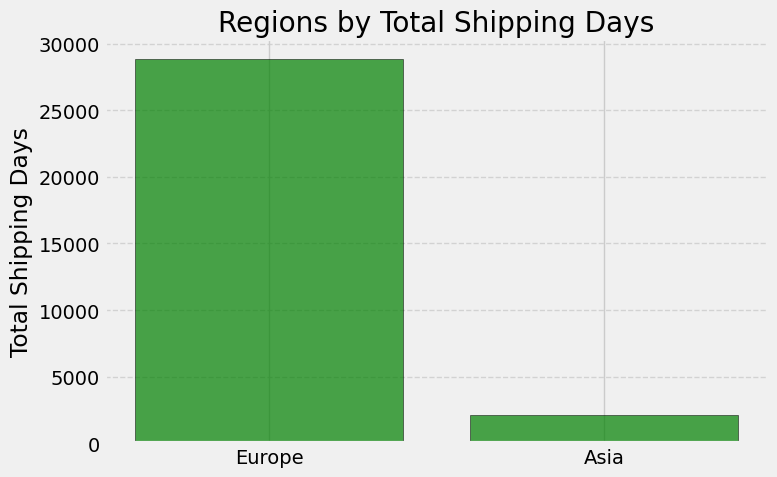

In [ ]:
regions = (data.groupby('Region')['Shipping Days'].sum().sort_values(ascending=False))

plt.figure(figsize=(8,5))
plt.bar(regions.index, regions.values, color='green', edgecolor='black', alpha=0.7)
plt.title("Regions by Total Shipping Days")
plt.ylabel("Total Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

В сумі днів доставки в Європі сильно більші ніж в Азії. Це означає, що в Європі куди більше замовлень

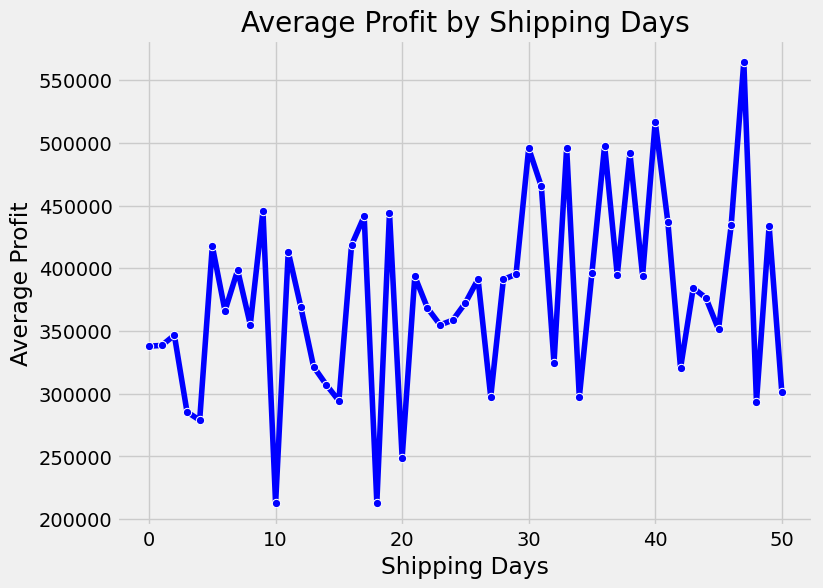

In [ ]:
profit_by_shipping_days = data.groupby("Shipping Days")["Profit"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=profit_by_shipping_days, x="Shipping Days", y="Profit", marker='o', color='blue')
plt.title("Average Profit by Shipping Days")
plt.xlabel("Shipping Days")
plt.ylabel("Average Profit")
plt.show()

Як видно з візуалізації найбільший спередній прибуток отримується при доставці у 47 днів

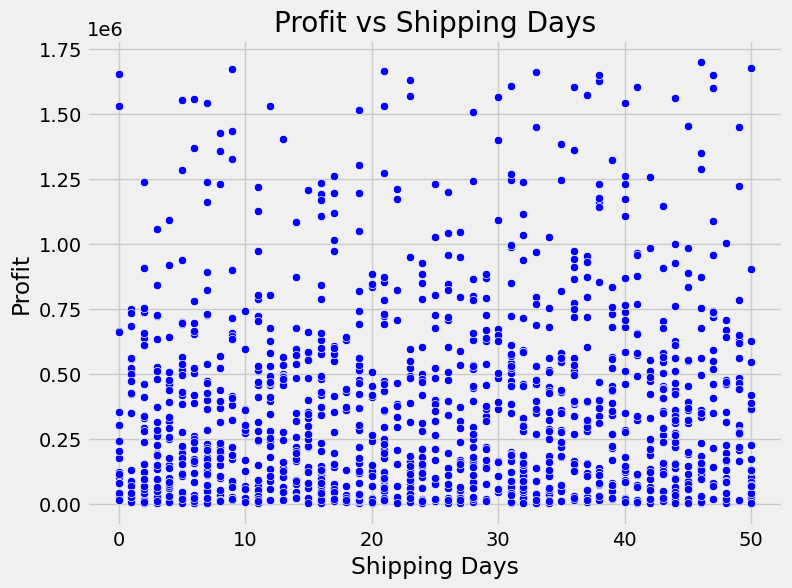

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, y="Profit", x="Shipping Days", color='blue')
plt.title("Profit vs Shipping Days")
plt.xlabel("Shipping Days")
plt.ylabel("Profit")
plt.show()

З діаграми розсіювання видно, що між прибутком та днями доставки немає кореляії

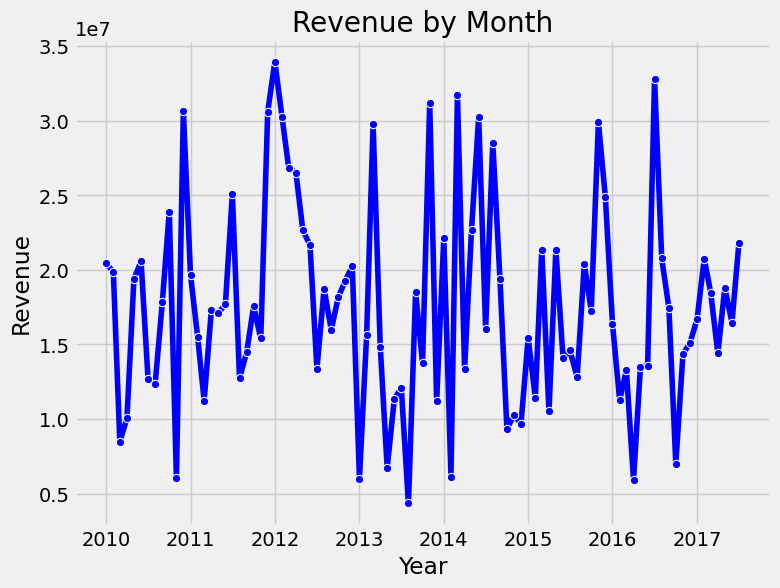

In [ ]:
monthly_revenue = data.groupby('Order YearMonth')['Revenue'].sum().reset_index()
monthly_revenue['Order YearMonth'] = monthly_revenue['Order YearMonth'].dt.to_timestamp()

plt.figure(figsize=(8, 6))
sns.lineplot(data=monthly_revenue, x="Order YearMonth", y="Revenue", marker="o", color='blue')
plt.title("Revenue by Month")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

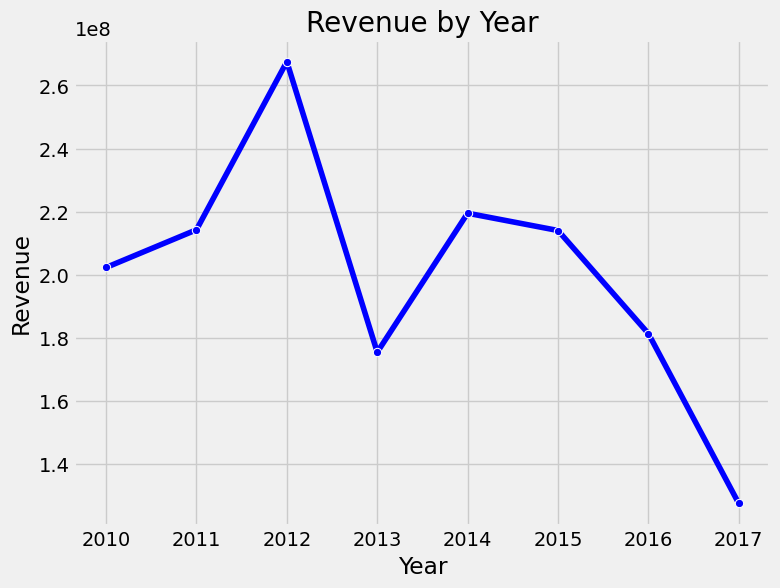

In [ ]:
monthly_revenue = data.groupby('Order Year')['Revenue'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=monthly_revenue, x="Order Year", y="Revenue", marker="o", color='blue')
plt.title("Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

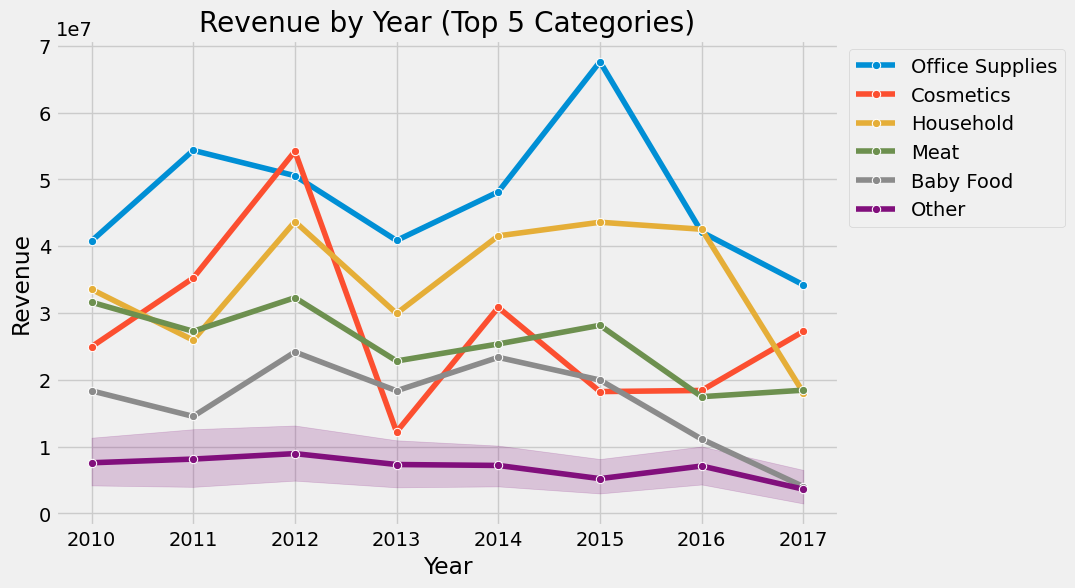

In [ ]:
categories = (data.groupby(['Order Year', 'Item Type'])['Revenue'].sum().sort_values(ascending=False).reset_index())

top_categories = categories.groupby('Item Type')['Revenue'].sum().nlargest(5).index

categories['Categories'] = categories['Item Type'].apply(lambda x: x if x in top_categories else 'Other')

grouped_data_for_plot = categories.groupby(['Order Year', 'Categories'])['Revenue'].sum().reset_index()

plt.figure(figsize=(9, 6))
sns.lineplot(data=categories, x="Order Year", y="Revenue", hue="Categories", marker="o")
plt.title("Revenue by Year (Top 5 Categories)")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Як бачимо по 5 найбільшими за доходами категоріями, що за останній рік доходи більшості з них впали, такі категорії як: Office Supplies, Household, Baby Food. А деякі виросли: Cosmetics, Meat. В цілому спостерігається більше падіння ніж зріст

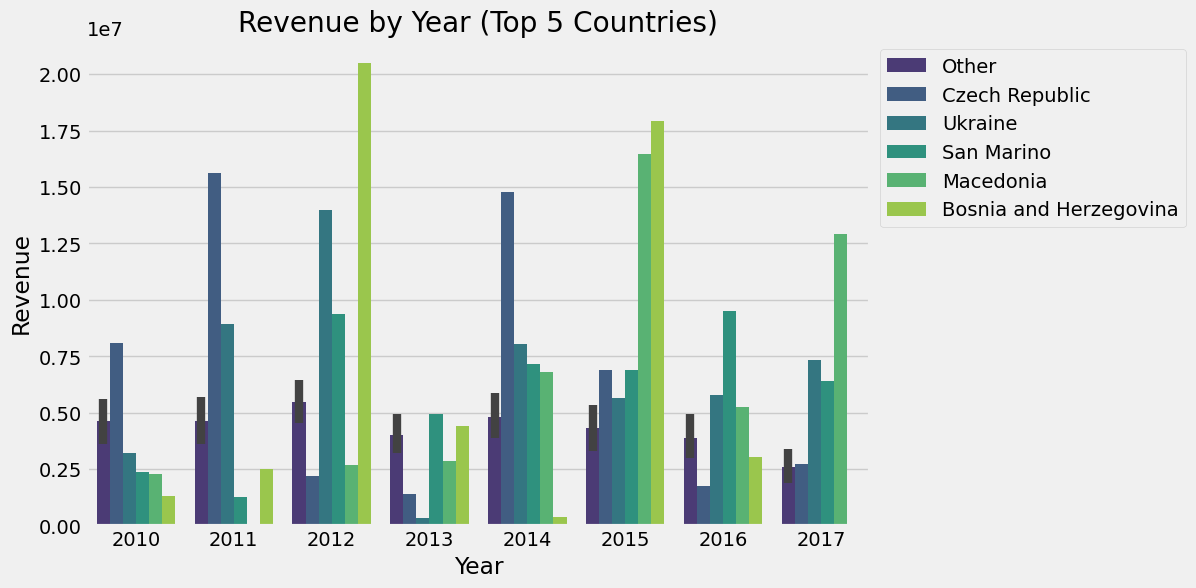

In [ ]:
countries = (data.groupby(['Order Year', 'Name'])['Revenue'].sum().sort_values(ascending=False).reset_index())

top_countries = countries.groupby('Name')['Revenue'].sum().nlargest(5).index

countries['Country'] = countries['Name'].apply(lambda x: x if x in top_countries else 'Other')

grouped_data_for_plot = countries.groupby(['Order Year', 'Country'])['Revenue'].sum().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(data=countries, x="Order Year", y="Revenue", hue="Country", palette="viridis")
plt.title("Revenue by Year (Top 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Найбільший дохід за весь час був у 2012 році у Bosnia and Herzegovina. Але в цілому доходи по країнах сильно нерівномірні та непередбачувані як видно на прикладі Bosnia and Herzegovina.

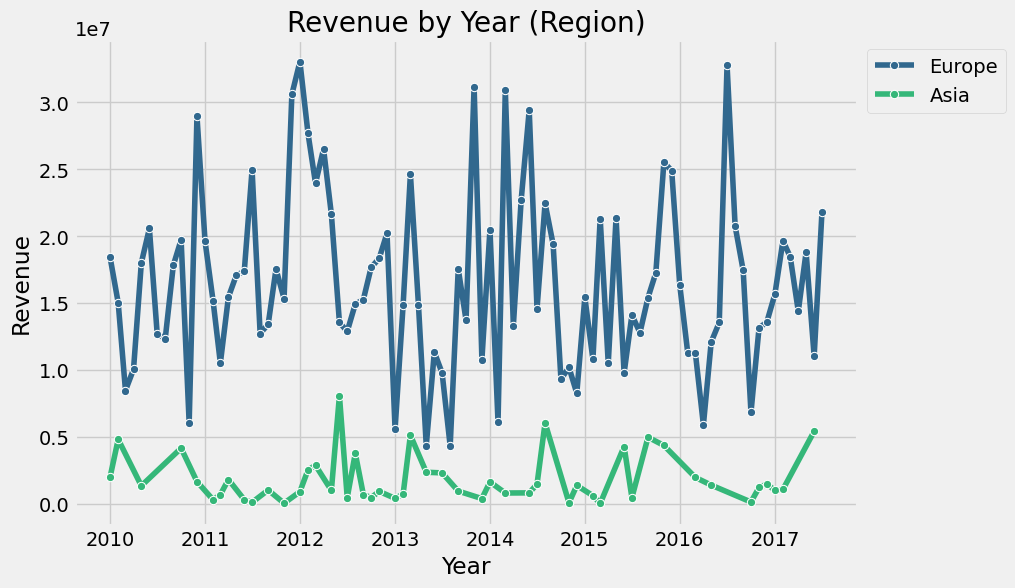

In [ ]:
categories_monthly = (data.groupby(['Order YearMonth', 'Region'] )['Revenue'].sum().sort_values(ascending=False).reset_index())
categories_monthly['Order YearMonth'] = categories_monthly['Order YearMonth'].dt.to_timestamp()

plt.figure(figsize=(9, 6))
sns.lineplot(data=categories_monthly, x="Order YearMonth", y="Revenue", hue="Region", marker="o", palette="viridis")
plt.title("Revenue by Year (Region)")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Найбльший дохід за місяць було зафіксувано у 2012 та 2016 році

Створюємо колонку для днів тижня

In [ ]:
data['Day of Week'] = data['Order Date'].dt.day_name()

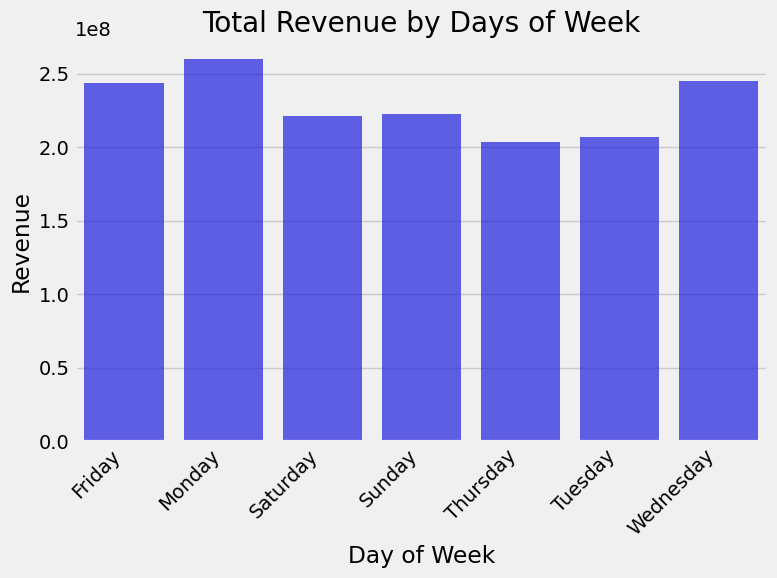

In [ ]:
sales_by_day_item = data.groupby(['Day of Week'])['Revenue'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_day_item, x='Day of Week', y='Revenue', color="blue", alpha=0.7)
plt.title('Revenue by Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Найбільший дохід спосстерігається в понеділок, середу та п'ятницю

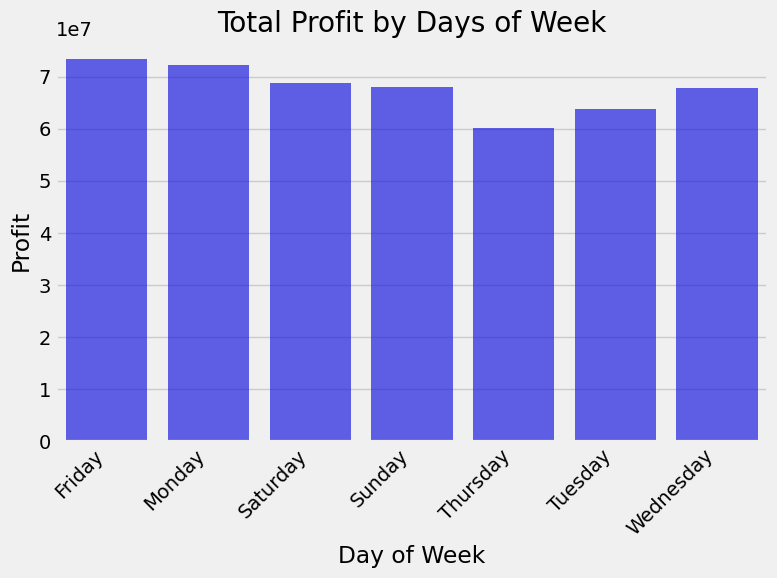

In [ ]:
sales_by_day_item = data.groupby(['Day of Week'])['Profit'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_day_item, x='Day of Week', y='Profit', color="blue", alpha=0.7)
plt.title('Profit by Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Найбільший прибуток спостерігається в п'ятницю та понеділок

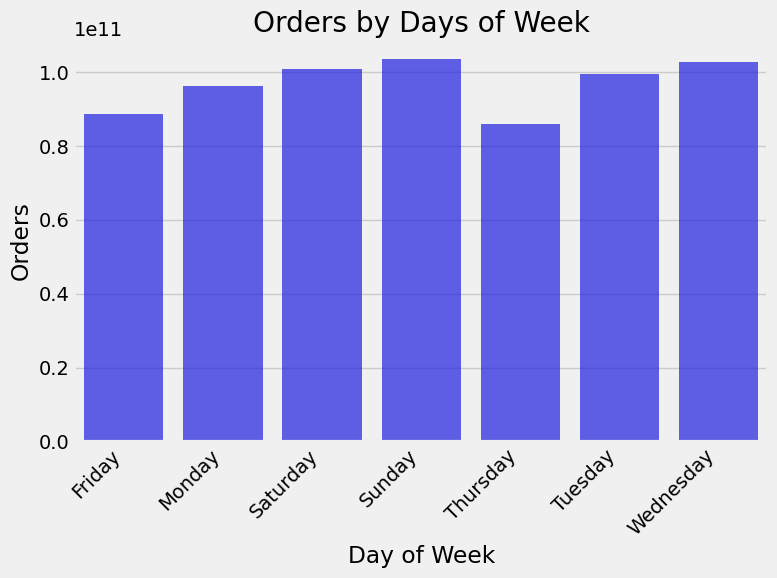

In [ ]:
sales_by_day_item = data.groupby(['Day of Week'])['Order ID'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_day_item, x='Day of Week', y='Order ID', color="blue", alpha=0.7)
plt.title('Orders by Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Найбільше замовлень відбувається у суботу, середу та п'ятницю

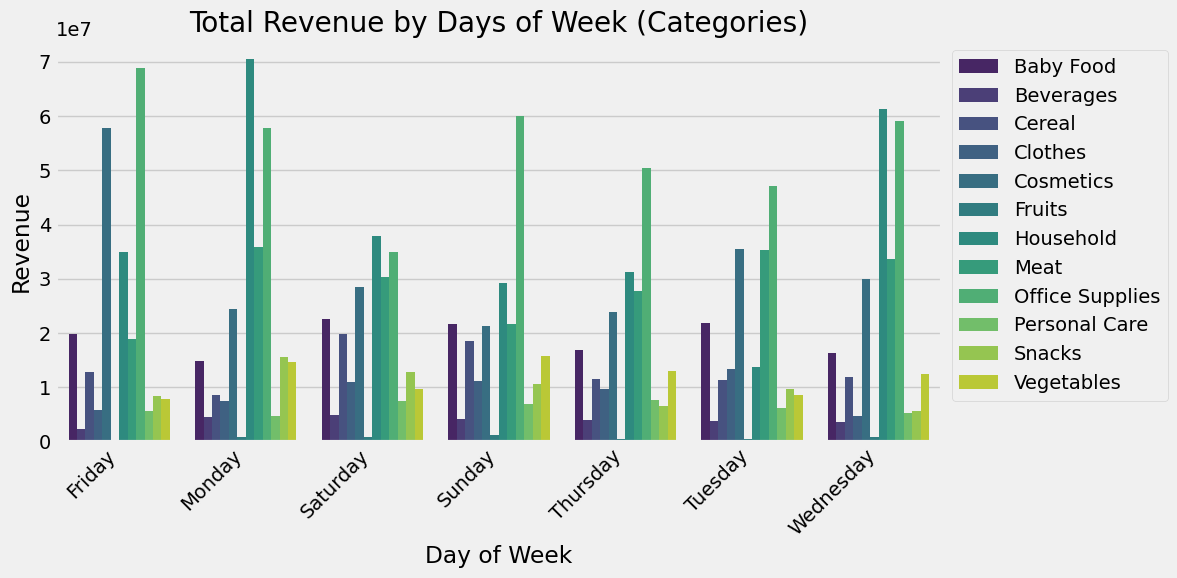

In [ ]:
sales_by_day_item = data.groupby(['Day of Week', 'Item Type'])['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_day_item, x='Day of Week', y='Revenue', hue='Item Type', palette='viridis')
plt.title('Total Revenue by Days of Week (Categories)')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

По візуалізації можу сказати, що категорія Household користується приносить особливо багато доходу у понедлок та середу, а Cosmetics у п'ятницю.

Висновок: Найприбутковішими категоріями товарів є Cosmetics, Office Supplies та Household, тому варто сфокусувати увагу саме на них. Найменш прибутковими є Fruits, Beverages, Personal Care, можливо варто переглянути стратегію щодо цих категорій товарів. Багато країн приблизно на однаковому рівні по доходу, проте найбільший дохід був отриманий в країнах: Chech Republic, Ukraine, Bosnia and Herzegovina, a найбільший прибуток був отриманий в країнах: Andorra, Ukraine, Malta. Дохід в Європі значно більший за дохід в Азії. В результаті дослідження каналів продажу стає очевидним, що немає суттєвої різниці в доходах від онлайн та офлайн продажів. В середньому найдовше йде доставка у категоріях: Baby Food, Cereal, Office Supplies, а найшвидше у Personal Care, Clothes, Fruits, а серед країн найдовше йде доставка через Hungary, Russia, Monaco, а найшвидше через Austria, Bosnia and Herzegovina, Lithuania. В середьому в Азії дні доставки трохи більші ніж у Європі, тому можна сказати, що ринок Азії уступає Європі тільки в об'ємах продаж, а в ефективності продажів не суттєво. З'ясувалось, що між прибутком та днями доставки немає кореляції. По 5 найбільшими за доходами категоріями за останній рік доходи більшості з них впали, такі категорії як: Office Supplies, Household, Baby Food. А деякі виросли: Cosmetics, Meat. В цілому спостерігається більше падіння ніж зріст, що підтверджується диномікою доходу по роках. Найбільше замовлень відбувається у суботу, середу та п'ятницю, а найбільший прибуток спостерігається в п'ятницю та понеділок, тому можна на ці влаштовувати акції і інші події.